In [1]:
# @title Install and import feedback gadget

!pip install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuromatch_neuroai",
            "user_key": "wb2cxze8",
        },
    ).render()

feedback_prefix = "Project_ComparingNetworks"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


---
## Section 1: Preparing the environment

In [2]:
# @markdown Colab // Kaggle installation (Part 1)

%cd /content
! git clone https://github.com/methylc/ComputationThruDynamicsBenchmark.git
%cd ComputationThruDynamicsBenchmark
! pip install -e .

## RUN THIS CELL, THEN RESTART SESSION AS PROMPTED (BUTTON AT BOTTOM OF THIS CELL'S FINISHED OUTPUT). DO NOT NEED TO RUN AGAIN
## PLEASE RESTART THE ENVIRONMENT FOR KAGGLE MANUALLY (Run > Restart & clear cell outputs)

/content
Cloning into 'ComputationThruDynamicsBenchmark'...
remote: Enumerating objects: 3505, done.
remote: Counting objects: 100% (379/379), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 3505 (delta 318), reused 296 (delta 260), pack-reused 3126
Receiving objects: 100% (3505/3505), 296.12 MiB | 23.46 MiB/s, done.
Resolving deltas: 100% (1992/1992), done.
/content/ComputationThruDynamicsBenchmark
Obtaining file:///content/ComputationThruDynamicsBenchmark
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.5 MB/s

In [1]:
# @markdown Colab // Kaggle installation (Part 2)

!pip uninstall -y torchaudio torchvision

Found existing installation: torchaudio 2.3.1+cu121
Uninstalling torchaudio-2.3.1+cu121:
  Successfully uninstalled torchaudio-2.3.1+cu121
Found existing installation: torchvision 0.18.1+cu121
Uninstalling torchvision-0.18.1+cu121:
  Successfully uninstalled torchvision-0.18.1+cu121


In [2]:
# @markdown Colab // Kaggle installation (Part 3)

## GET BACK TO THE DIRECTORY AND CONFIGURE .env

################ COLAB #####################

%cd /content/ComputationThruDynamicsBenchmark/
envStr = """HOME_DIR=/content/ComputationThruDynamicsBenchmark/
#Don't change these
TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
EVAL_TARGET_FILE=eval_target.h5
"""

#############################################

################ KAGGLE #####################

# %cd /kaggle/working/ComputationThruDynamicsBenchmark/
# envStr = """HOME_DIR=/kaggle/working/ComputationThruDynamicsBenchmark/
# #Don't change these
# TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
# EVAL_TARGET_FILE=eval_target.h5
# """

##############################################

################ COLAB // KAGGLE #####################

with open('.env','w') as f:
  f.write(envStr)

##############################################

/content/ComputationThruDynamicsBenchmark


In [3]:
# @markdown Colab // Kaggle installation (Part 4)

!git clone https://github.com/mitchellostrow/DSA
%cd DSA/
!pip install -e .

Cloning into 'DSA'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 340 (delta 16), reused 24 (delta 14), pack-reused 304
Receiving objects: 100% (340/340), 1.52 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (189/189), done.
/content/ComputationThruDynamicsBenchmark/DSA
Obtaining file:///content/ComputationThruDynamicsBenchmark/DSA
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 14.2 MB/s eta 0:00:00
  Running setup.py develop for DSA


## Dir

In [4]:
# set the random seed for reproducibility
import random
import dotenv
import pathlib
import os
import logging

# comment the next three lines if you want to see all training logs
pl_loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict if 'pytorch_lightning' in name]
for pl_log in pl_loggers:
    logging.getLogger(pl_log.name).setLevel(logging.WARNING)

random.seed(2024)

dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
if HOME_DIR is None:
    HOME_DIR = ""
print(HOME_DIR)

/content/ComputationThruDynamicsBenchmark/


### CO Test

In [5]:
from ctd.task_modeling.task_env.task_env import RandomTarget_CO
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle
# Create the analysis object:
rt_task_env = RandomTarget_CO(effector = RigidTendonArm26(muscle = MujocoHillMuscle()))

from ctd.task_modeling.model.rnn import GRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer

# Step 1: Instantiate the model
rnn = GRU_RNN(latent_size = 128) # Look in ctd/task_modeling/models for alternative choices!

# Step 2: Instantiate the task environment
task_env = rt_task_env

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples = 1000, batch_size = 256)

# Step 4: Instantiate the task wrapper
task_wrapper = TaskTrainedWrapper(learning_rate=1e-3, weight_decay = 1e-8)

# Step 5: Initialize the model with the input and output sizes
rnn.init_model(
    input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0],
    output_size = task_env.action_space.shape[0]
    )

# Step 6:  Set the environment and model in the task wrapper
task_wrapper.set_environment(task_env)
task_wrapper.set_model(rnn)

# Step 7: Define the PyTorch Lightning Trainer object (put `enable_progress_bar=True` to observe training progress)
trainer = Trainer(accelerator= "cpu",max_epochs=5,enable_progress_bar=True)

# Step 8: Fit the model
trainer.fit(task_wrapper, task_datamodule)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'data_env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['data_env'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/content/ComputationThruDynamicsBenchmark/ctd/task_modeling/task_env/task_env.py:609: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(angs, dtype=torch.float32, device=self.device)
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


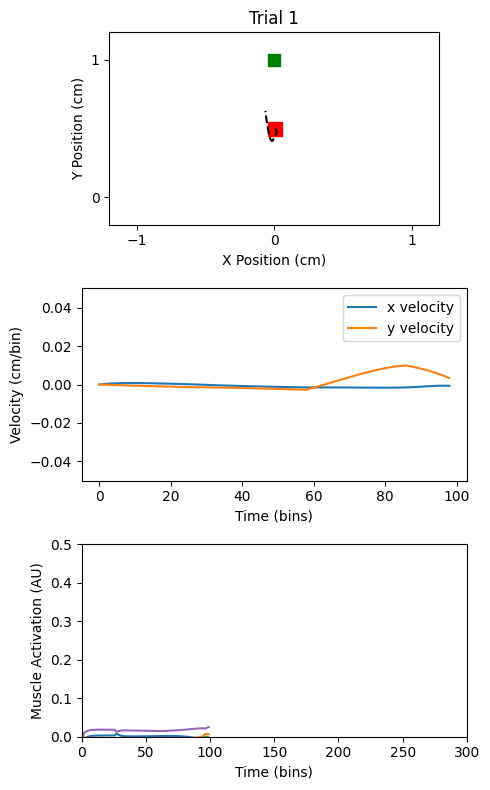

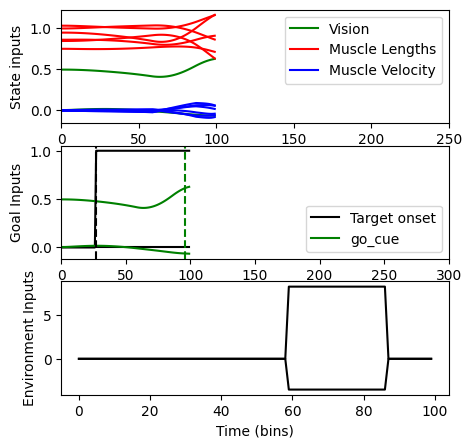

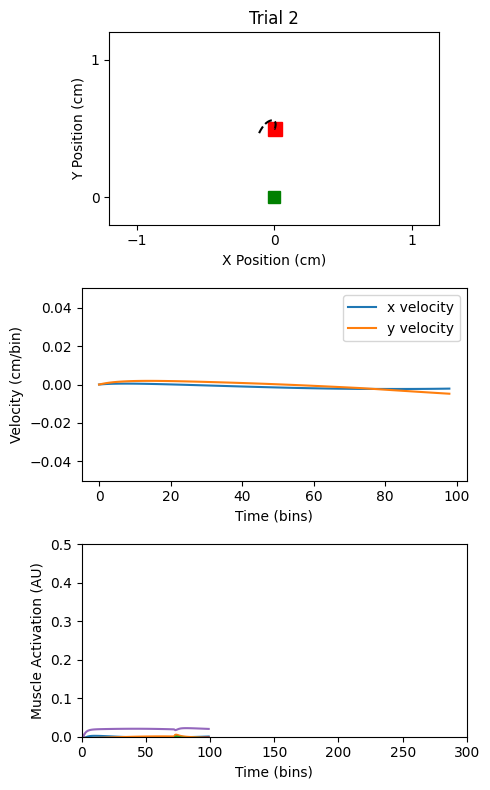

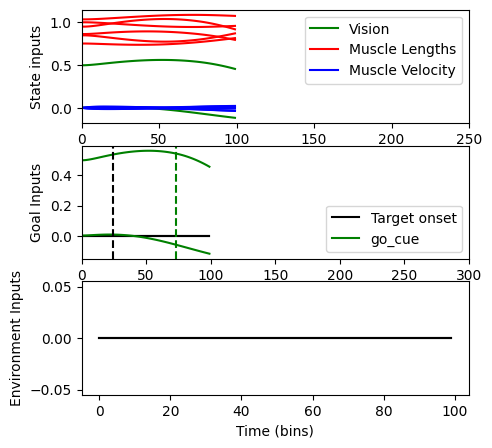

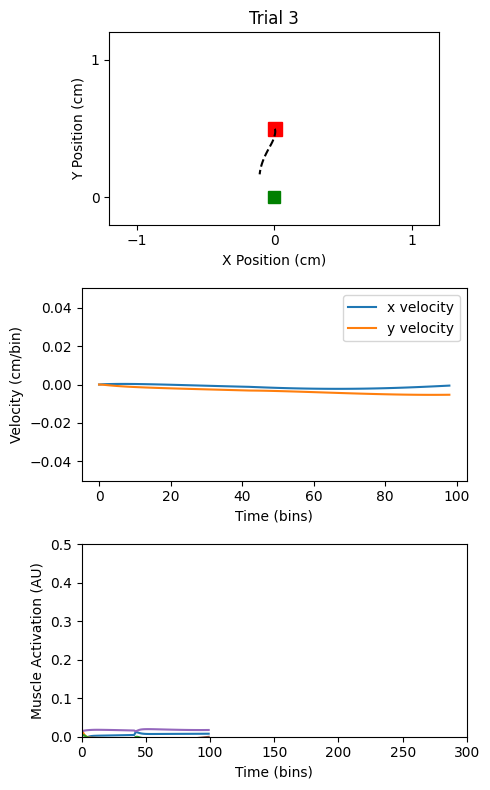

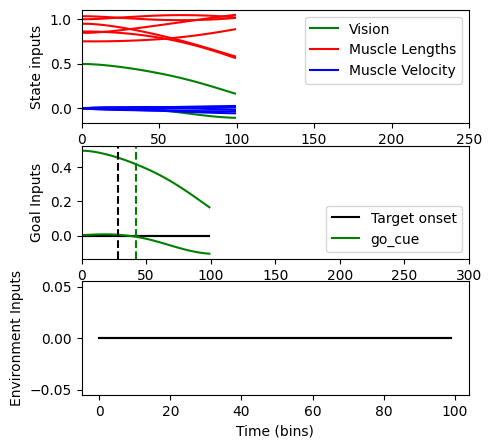

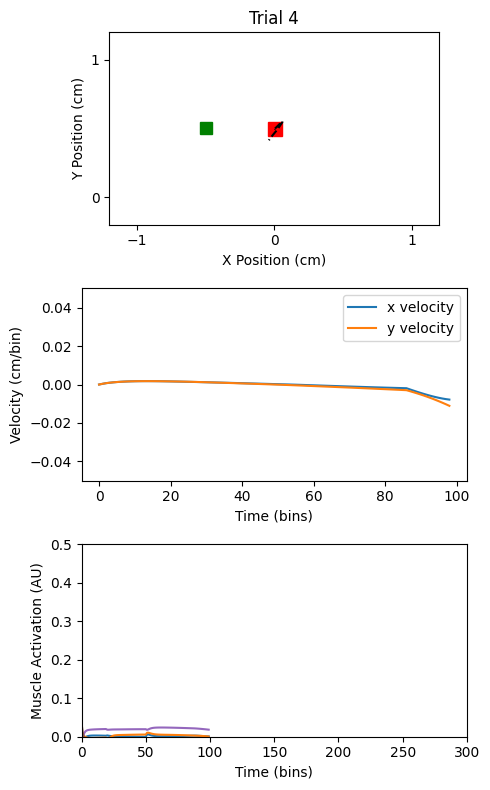

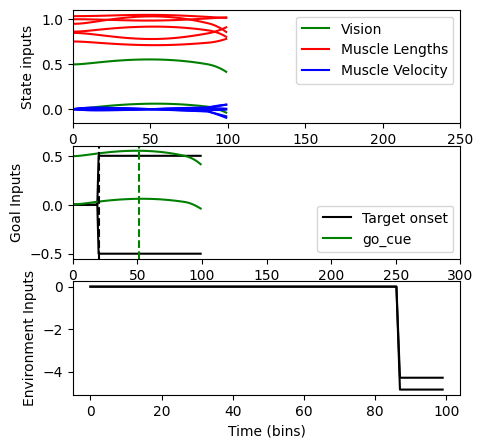

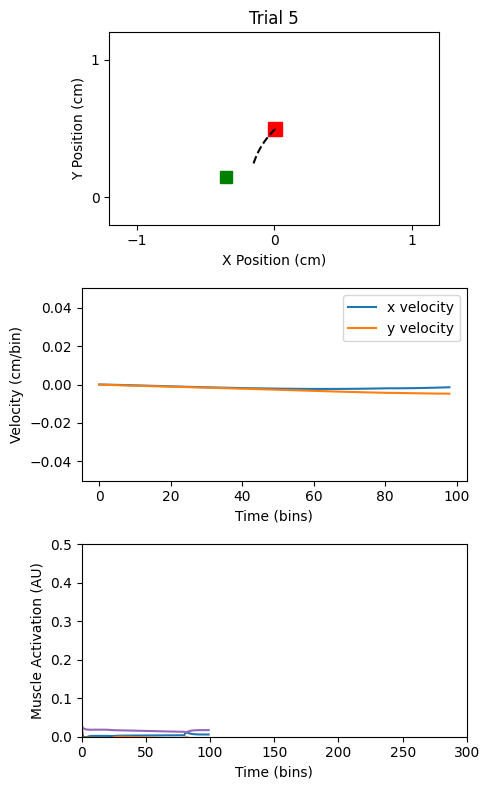

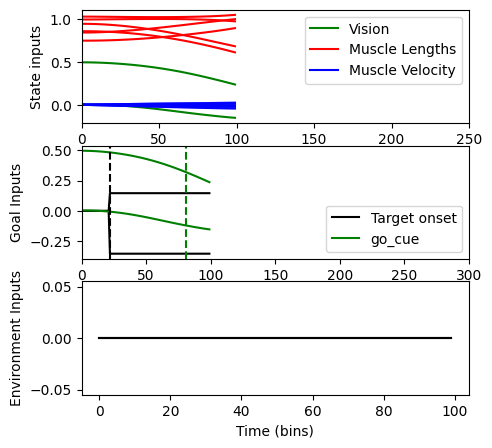

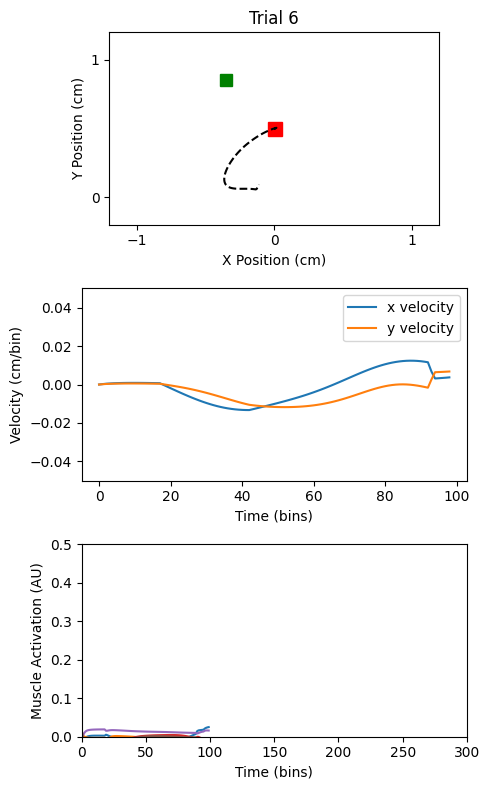

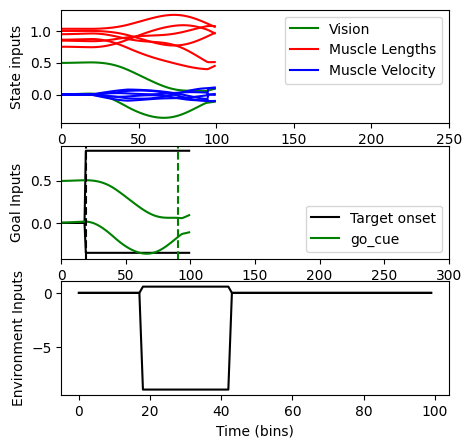

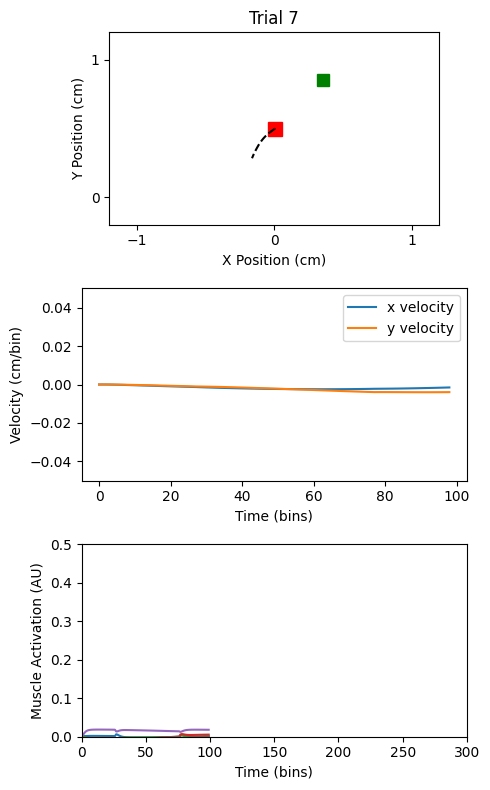

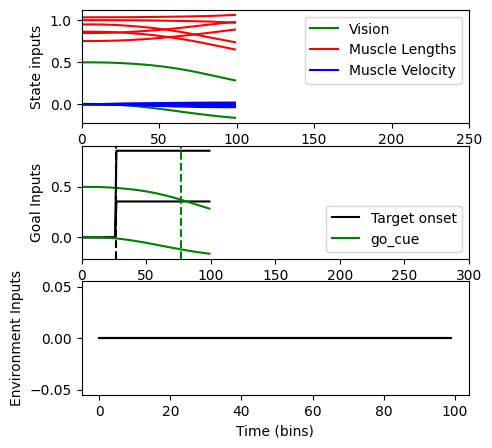

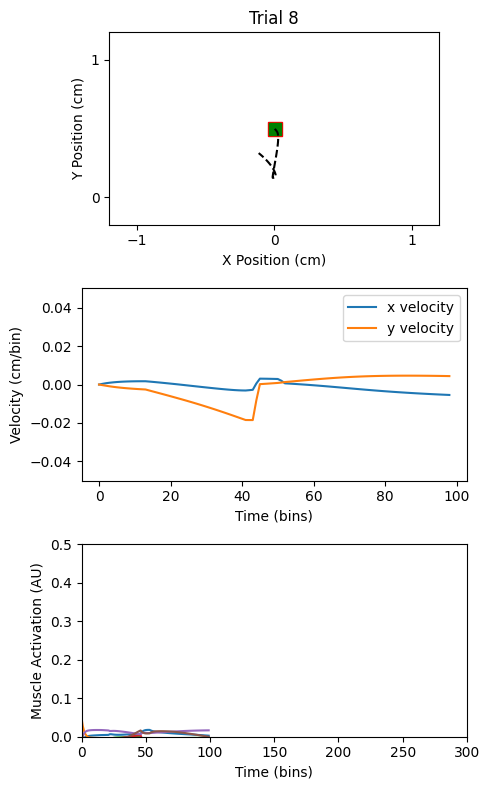

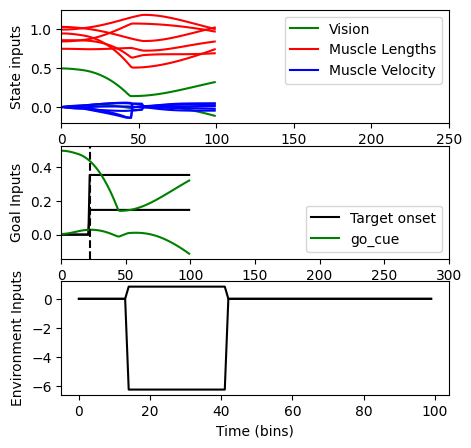

In [6]:
import pickle
# save model as .pkl
save_dir = pathlib.Path(HOME_DIR) / "models_CO_GRU_128"
save_dir.mkdir(exist_ok=True)
with open(save_dir / "model.pkl", "wb") as f:
    pickle.dump(task_wrapper, f)

# save datamodule as .pkl
with open(save_dir / "datamodule_sim.pkl", "wb") as f:
    pickle.dump(task_datamodule, f)

from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
from ctd.comparison.analysis.tt.tt import Analysis_TT

fpath_CO_GRU_128 = HOME_DIR + "models_CO_GRU_128/"
# Create the analysis object:
analysis_CO_GRU_128 = TT_RandomTarget(
    run_name = "CO_GRU_128",
    filepath = fpath_CO_GRU_128)

analysis_CO_GRU_128.plot_trial(1)
analysis_CO_GRU_128.plot_trial(2)
analysis_CO_GRU_128.plot_trial(3)
analysis_CO_GRU_128.plot_trial(4)
analysis_CO_GRU_128.plot_trial(5)
analysis_CO_GRU_128.plot_trial(6)
analysis_CO_GRU_128.plot_trial(7)
analysis_CO_GRU_128.plot_trial(8)

/content/ComputationThruDynamicsBenchmark/ctd/comparison/analysis/tt/tasks/tt_RandomTarget.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 8))


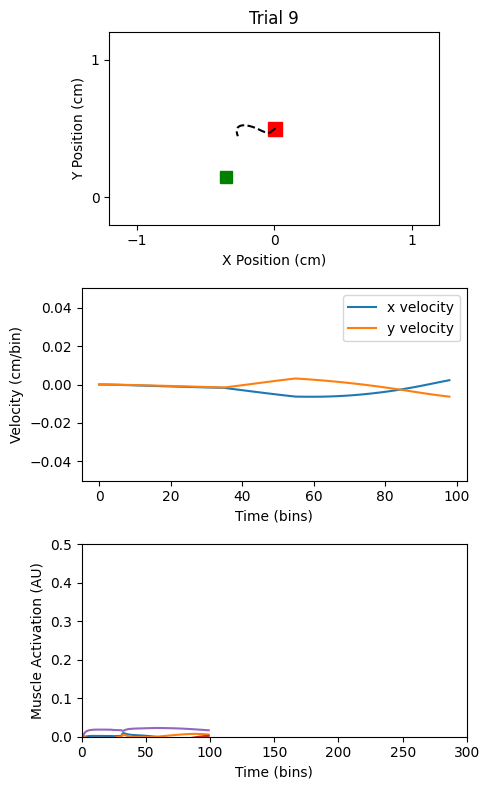

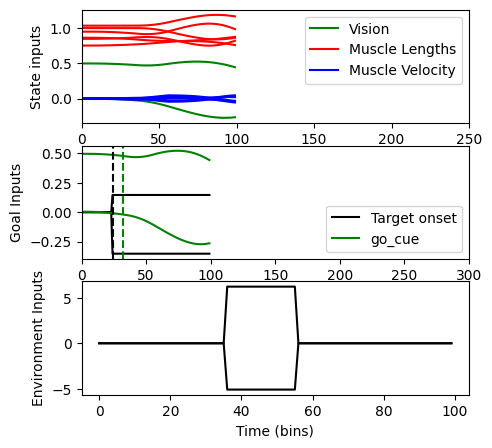

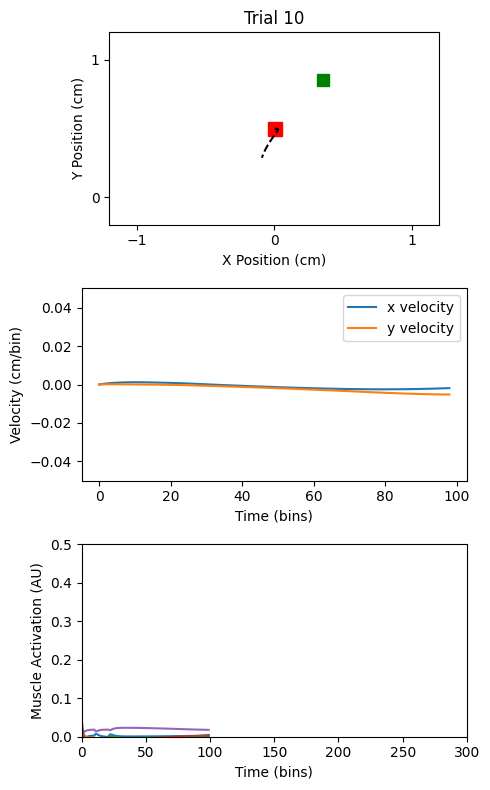

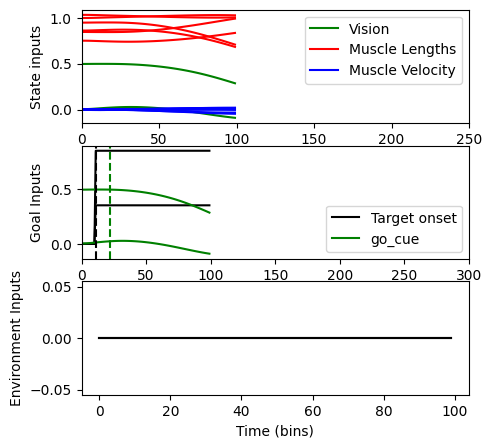

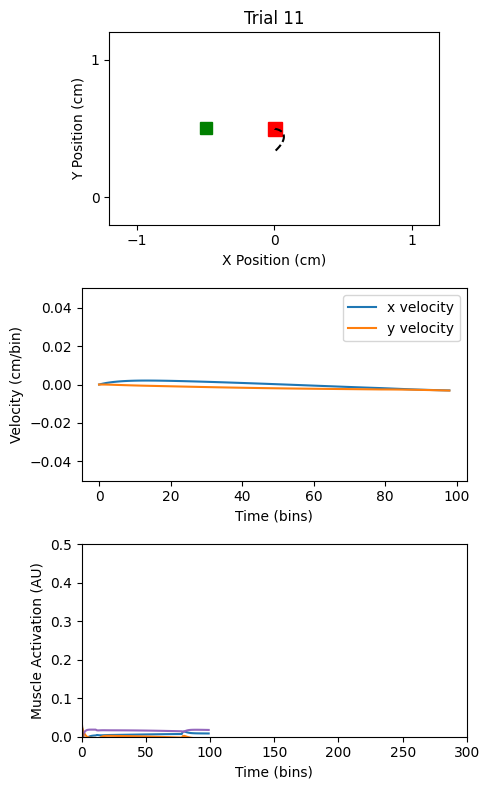

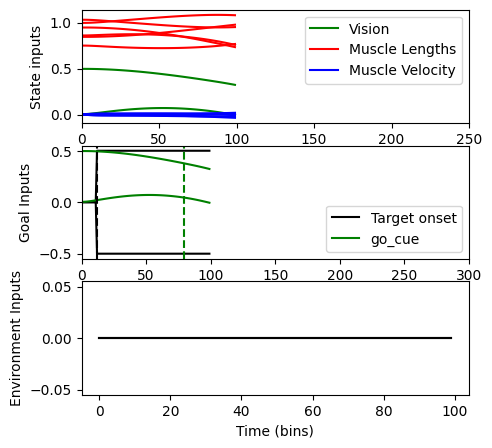

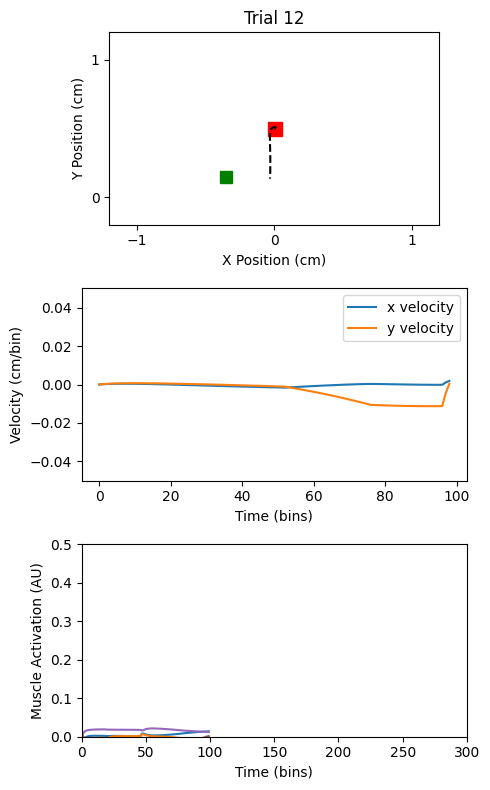

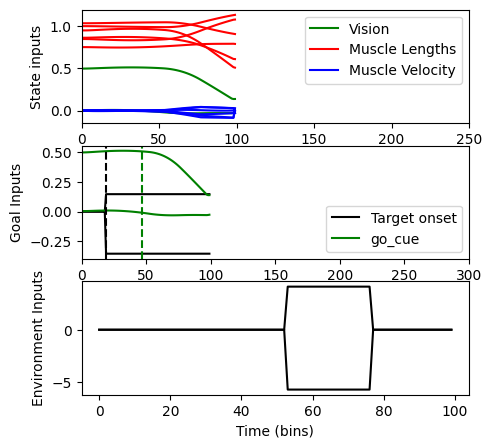

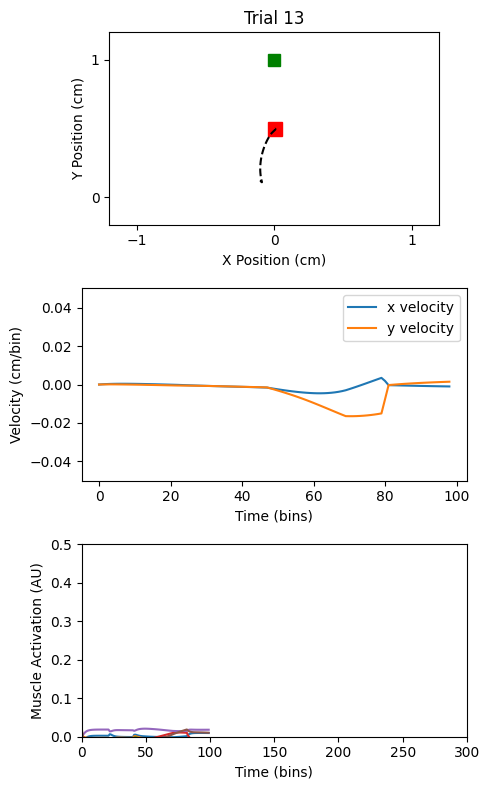

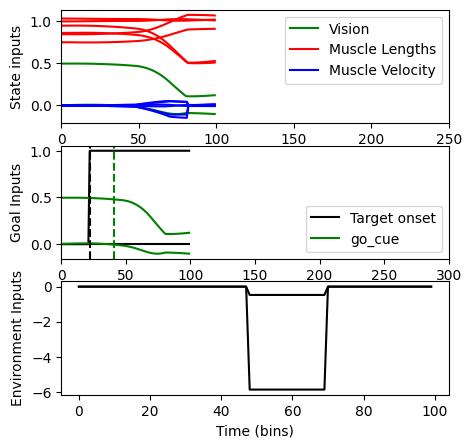

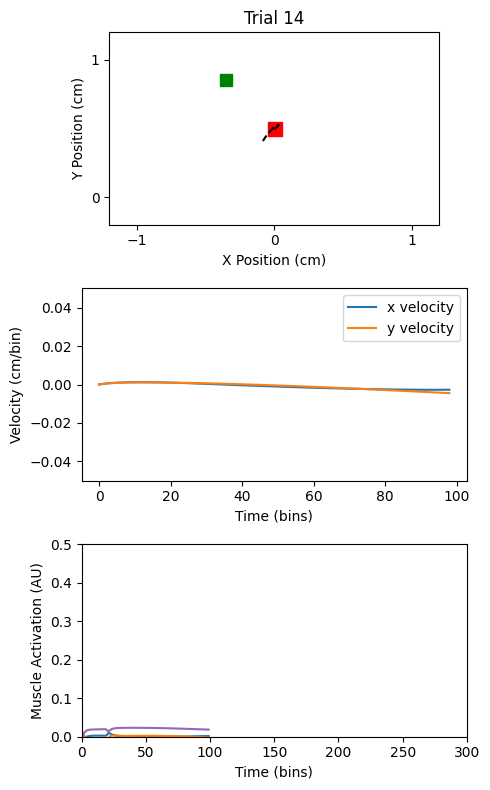

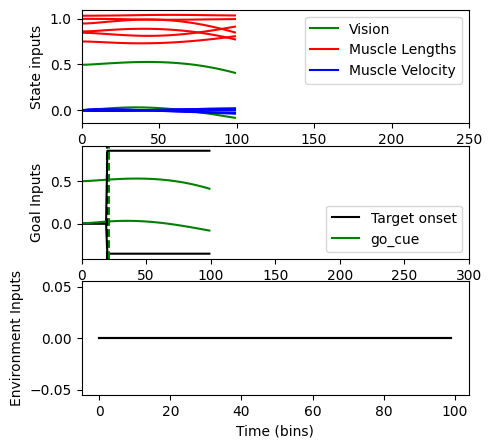

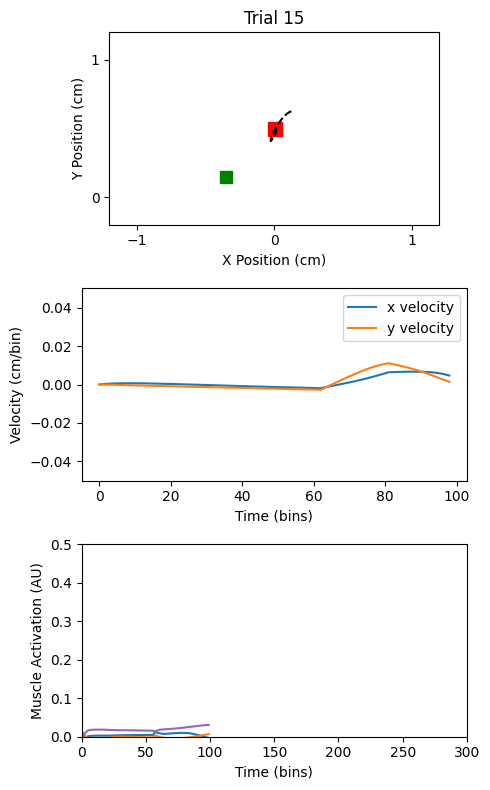

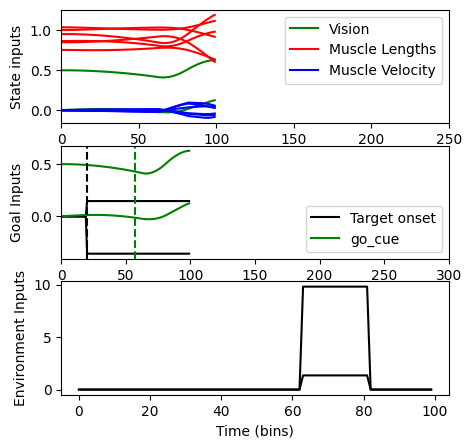

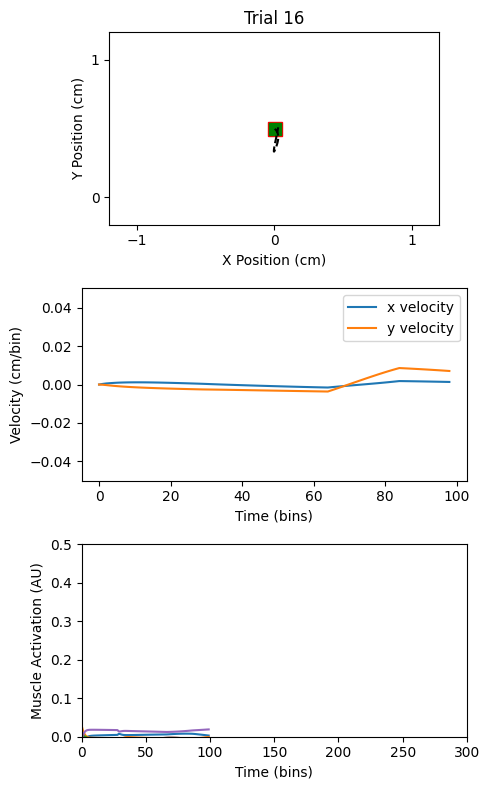

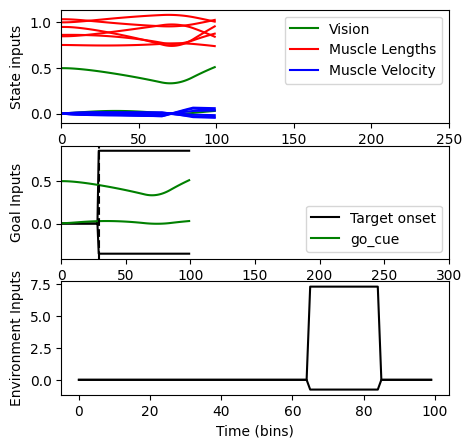

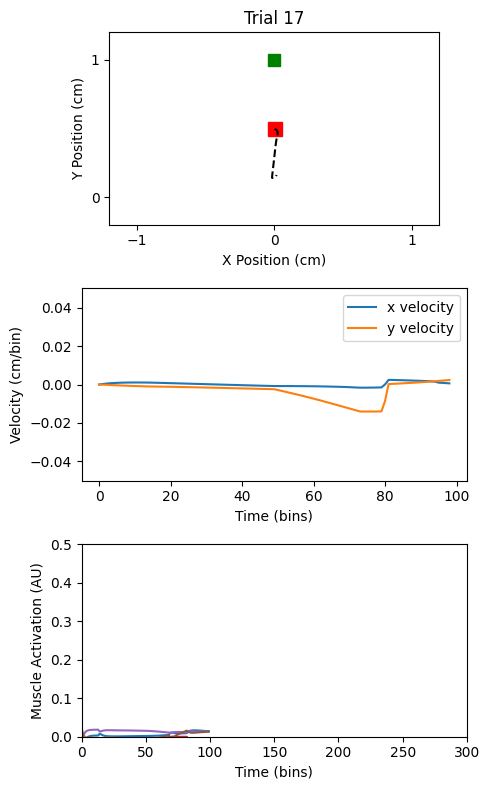

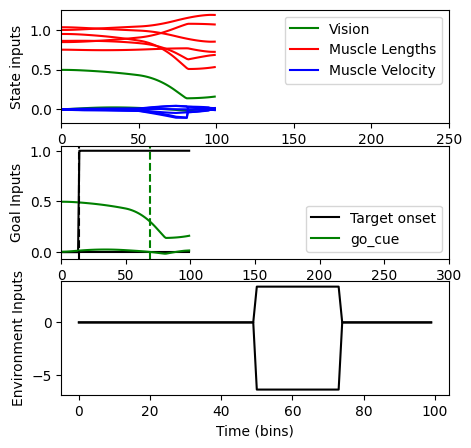

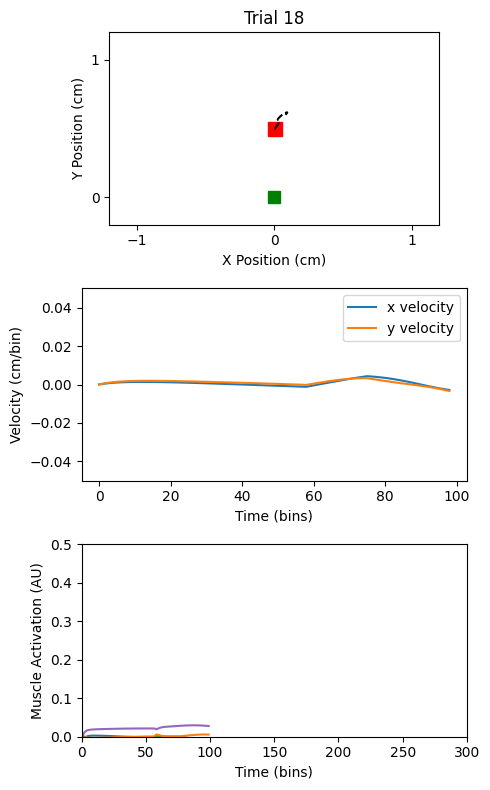

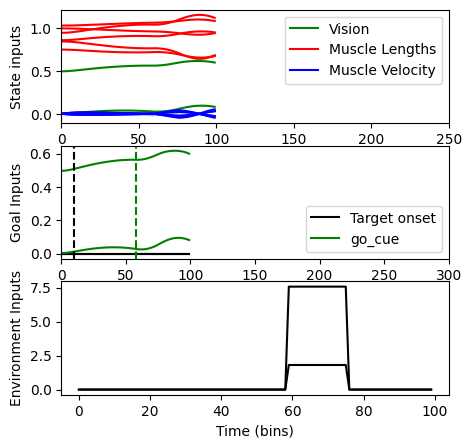

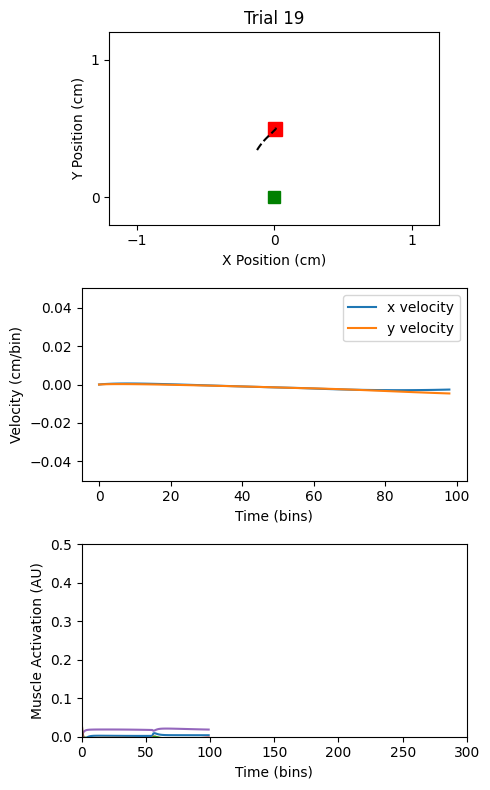

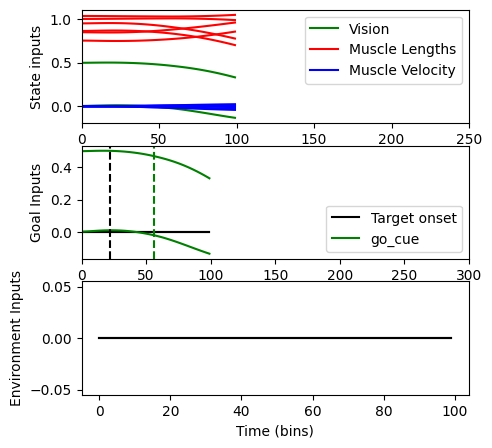

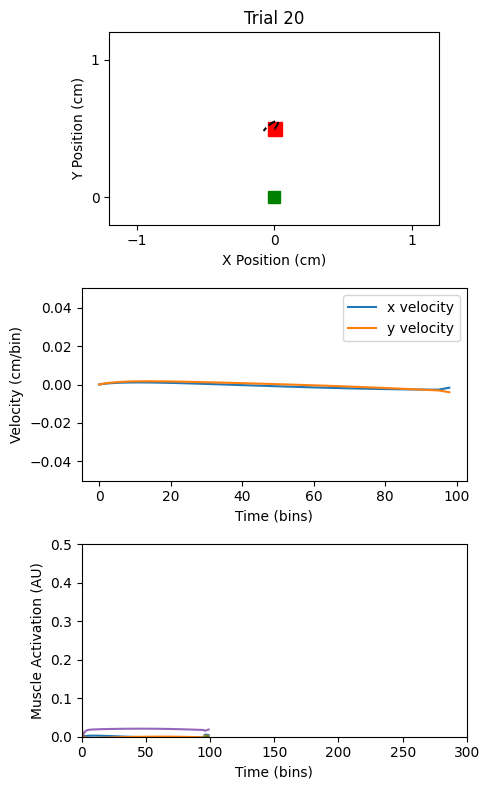

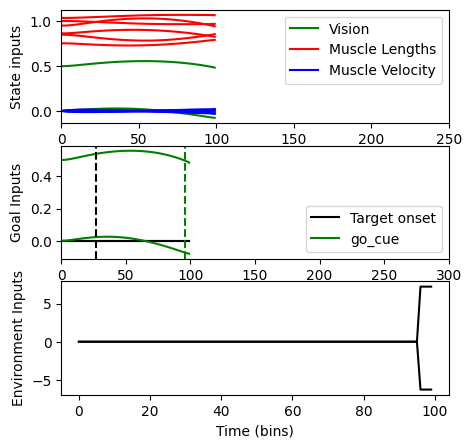

In [7]:
analysis_CO_GRU_128.plot_trial(9)
analysis_CO_GRU_128.plot_trial(10)
analysis_CO_GRU_128.plot_trial(11)
analysis_CO_GRU_128.plot_trial(12)
analysis_CO_GRU_128.plot_trial(13)
analysis_CO_GRU_128.plot_trial(14)
analysis_CO_GRU_128.plot_trial(15)
analysis_CO_GRU_128.plot_trial(16)
analysis_CO_GRU_128.plot_trial(17)
analysis_CO_GRU_128.plot_trial(18)
analysis_CO_GRU_128.plot_trial(19)
analysis_CO_GRU_128.plot_trial(20)